## Deep Reinforcement Learning  for Bitcoin Option Pricing




**Our real market data is from Jex Exchange(Jex.com). JEX Exchange is an efficient blockchain asset/derivatives trading platform, and customers can release their option contracts on jex exchange. Therefore, knowing a way to make propoer option price is very important to customers.**

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy.stats import norm
import random
import sys

### Get Data From Jex Exchange

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymongo import MongoClient
from datetime import datetime 
from scipy.stats import norm
import random
import time
import sys

def getRiseExPrice(data, list):
    for item in data:
        exPrice = item['price'] * 500 - np.max([(item['referencePrice'] - item['exerTionPrice']),0])
        diffs = item['referencePrice'] - item['exerTionPrice']
        list.append([time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(item['times'])), 
                         item['price'],
                         item['referencePrice'],
                         item['exerTionPrice'],
                         exPrice,   
                         diffs,
                         exPrice / item['referencePrice'] * 100, 
                         item['referencePrice'] - item['exerTionPrice'],
                         item['volume']])

def getFallExPrice(data, list):
    for item in data:
        exPrice = item['price'] * 500 - np.max([(item['exerTionPrice'] - item['referencePrice']),0])
        diffs = item['referencePrice'] - item['exerTionPrice'] 
        list.append([time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(item['times'])),
                         item['price'],
                         item['referencePrice'],
                         item['exerTionPrice'],
                         exPrice,
                         diffs,
                         exPrice / item['referencePrice'] * 100, 
                         item['exerTionPrice'] - item['referencePrice'],
                         item['volume']])

def getData():

    client = MongoClient('119.28.87.206', 21707)

    MonthFallFallClient = client["BOOMHASH"]["{}MonthFall".format("BTC")]
    MonthRiseRiseClinet = client["BOOMHASH"]["{}MonthRise".format("BTC")]

    WeekFallFallClient = client["BOOMHASH"]["{}WeekFall".format("BTC")]
    WeekRiseRiseClinet = client["BOOMHASH"]["{}WeekRise".format("BTC")]
    #print(MonthRiseRiseClinet)

    # Monthly BTC call option
    MonthRiseRiseData = MonthRiseRiseClinet.find({'times': {"$gte": 1545641100}}, {'_id': 0}).sort('times', -1)

    # Monthly BTC put option
    MonthFallFallData = MonthFallFallClient.find({'times': {"$gte": 1545641100}}, {'_id': 0}).sort('times', -1)

    # Weekly BTC call option
    WeekRiseRiseData = WeekRiseRiseClinet.find({'times': {"$gte": 1545641100}}, {'_id': 0}).sort('times', -1)

    # Weekly BTC put option
    WeekFallFallData = WeekFallFallClient.find({'times': {"$gte": 1545641100}}, {'_id': 0}).sort('times', -1)

    monthRiseRiseDataList = []
    monthFallFallDataList = []
    weekRiseRiseDataList = []
    weekFallFallDataList = []

    getRiseExPrice(MonthRiseRiseData, monthRiseRiseDataList)
    getFallExPrice(MonthFallFallData, monthFallFallDataList)
    getRiseExPrice(WeekRiseRiseData, weekRiseRiseDataList)
    getFallExPrice(WeekFallFallData, weekFallFallDataList)
    
    monthRiseRiseDataList = list(reversed(monthRiseRiseDataList))
    weekRiseRiseDataList = list(reversed(weekRiseRiseDataList))
    monthFallFallDataList = list(reversed(monthFallFallDataList))
    weekFallFallDataList = list(reversed(weekFallFallDataList))
    
    #dn = np.array([monthRiseRiseDataList, monthFallFallDataList, weekRiseRiseDataList, weekFallFallDataList])
    
    df_MonthRise = pd.DataFrame(monthRiseRiseDataList, columns=['Time', 'Price', 'Spot', 'Strike_Price', 'Extrinsic', 'diffs', 'Ex/S', 'out/put', 'Volume'])
    df_WeekRise = pd.DataFrame(weekRiseRiseDataList, columns=['Time', 'Price', 'Spot', 'Strike_Price', 'Extrinsic', 'diffs', 'Ex/S', 'out/put', 'Volume'])
    df_MonthFall = pd.DataFrame(monthFallFallDataList, columns=['Time', 'Price', 'Spot', 'Strike_Price', 'Extrinsic', 'diffs', 'Ex/S', 'out/put', 'Volume'])
    df_WeekFall = pd.DataFrame(weekFallFallDataList, columns=['Time', 'Price', 'Spot', 'Strike_Price', 'Extrinsic', 'diffs', 'Ex/S', 'out/put', 'Volume'])
    
    #df[['Ex/S', 'out/put']].plot(secondary_y = 'out/put')
    #df.plot()

    #print(df)
    return df_MonthRise, df_MonthFall, df_WeekRise, df_WeekFall
    
    

#if __name__ == '__main__':
#    getData()


In [3]:
def getTimeDiff(timeStra,timeStrb):
        if timeStra<=timeStrb:
            return 0
        ta = datetime.strptime(timeStra, "%Y/%m/%d %H:%M:%S")
        tb = datetime.strptime(timeStrb, "%Y/%m/%d %H:%M:%S")
        diff = ta - tb
        #dataTimeb=datetime(y,m,d,H,M,S)
        #secondsDiff=(dataTimea-dataTimeb).seconds
        
        #minutesDiff=round(secondsDiff/60,1)
        
        secs = diff.total_seconds()
        minutesdiff = secs / 60
        return minutesdiff

In [4]:
df_MonthCall, df_MonthPut, df_WeekCall, df_WeekPut = getData()

In [5]:
df_weekcall = df_WeekCall.copy()
df_weekput = df_WeekPut.copy()
df_monthcall = df_MonthCall.copy()
df_monthput = df_MonthPut.copy()

In [6]:
df_weekput.tail()

,Time,Price,Spot,Strike_Price,Extrinsic,diffs,Ex/S,out/put,Volume
5697,2019/01/20 07:55:00,0.1851,3528.4899,3555.134,65.9059,-26.6441,1.867822,26.6441,696.0
5698,2019/01/20 08:00:00,0.1831,3530.6835,3555.134,67.0995,-24.4505,1.900468,24.4505,4978.0
5699,2019/01/20 08:05:00,0.1829,3530.3521,3555.134,66.6681,-24.7819,1.888426,24.7819,514.0
5700,2019/01/20 08:10:00,0.1828,3529.8493,3555.134,66.1153,-25.2847,1.873035,25.2847,1536.0
5701,2019/01/20 08:15:00,0.1828,3530.2381,3555.134,66.5041,-24.8959,1.883842,24.8959,1637.0


In [7]:
date1 = '2018/12/26 00:50:00'
date2 = '2019/01/02 00:50:00'
date3 = '2019/01/09 00:50:00'
date4 = '2019/01/16 00:50:00'

index1 = np.where(df_weekput.Time == date1)
index2 = np.where(df_weekput.Time == date2)
index3 = np.where(df_weekput.Time == date3)
#index4 = np.where(df_weekcall.Time == date4)

index1 = index1[0]
index2 = index2[0]
index3 = index3[0]
#index4 = index4[0]

index1 = index1[0]
index2 = index2[0]
index3 = index3[0]
#index4 = index4[0]

df_week1put = df_weekput[0:index1+1]
df_week2put = df_weekput[index1+1:index2+1]
df_week3put = df_weekput[index2+2:index3]

In [8]:
df_week2put.head()

,Time,Price,Spot,Strike_Price,Extrinsic,diffs,Ex/S,out/put,Volume
382,2018/12/26 02:00:00,0.4438,3730.0000,3743.3166,208.5834,-13.3166,5.592048,13.3166,66392.0
383,2018/12/26 02:05:00,0.4443,3725.5759,3743.3166,204.4093,-17.7407,5.486650,17.7407,104293.0
384,2018/12/26 02:10:00,0.4427,3727.0000,3743.3166,205.0334,-16.3166,5.501299,16.3166,81249.0
385,2018/12/26 02:15:00,0.4456,3729.8270,3743.3166,209.3104,-13.4896,5.611799,13.4896,122574.0
386,2018/12/26 02:20:00,0.4461,3724.0896,3743.3166,203.8230,-19.2270,5.473096,19.2270,108821.0


In [9]:
df_week2put.tail()

,Time,Price,Spot,Strike_Price,Extrinsic,diffs,Ex/S,out/put,Volume
1999,2019/01/02 00:30:00,0.0072,3766.3300,3743.3166,3.60,23.0134,0.095584,-23.0134,12117.0
2000,2019/01/02 00:35:00,0.0050,3763.7773,3743.3166,2.50,20.4607,0.066423,-20.4607,22471.0
2001,2019/01/02 00:40:00,0.0036,3767.9482,3743.3166,1.80,24.6316,0.047771,-24.6316,8885.0
2002,2019/01/02 00:45:00,0.0019,3766.6453,3743.3166,0.95,23.3287,0.025221,-23.3287,12437.0
2003,2019/01/02 00:50:00,0.0007,3766.0000,3743.3166,0.35,22.6834,0.009294,-22.6834,4466.0


## Parameters for Monte Carlo simulation of stock prices

In [10]:
S0 = 3730      # initial bitcoin price in usdt
mu = 0.5     # drift
sigma = 0.17  # volatility
r = 0.03      # risk-free rate
M = 1         # maturity

T = 24        # number of time steps
N_MC = 10000  # number of paths

delta_t = M / T                # time interval
gamma = np.exp(- r * delta_t)  # discount factor

### Black-Sholes Simulation
Simulate $N_{MC}$ stock price sample paths with $T$ steps by the classical Black-Sholes formula.

$$dS_t=\mu S_tdt+\sigma S_tdW_t\quad\quad S_{t+1}=S_te^{\left(\mu-\frac{1}{2}\sigma^2\right)\Delta t+\sigma\sqrt{\Delta t}Z}$$

where $Z$ is a standard normal random variable.

Based on simulated stock price $S_t$ paths, compute state variable $X_t$ by the following relation.

$$X_t=-\left(\mu-\frac{1}{2}\sigma^2\right)t\Delta t+\log S_t$$

Also compute

$$\Delta S_t=S_{t+1}-e^{r\Delta t}S_t\quad\quad \Delta\hat{S}_t=\Delta S_t-\Delta\bar{S}_t\quad\quad t=0,...,T-1$$

where $\Delta\bar{S}_t$ is the sample mean of all values of $\Delta S_t$.

In [11]:
# make a dataset
starttime = time.time()
np.random.seed(42)

# stock price
S = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
S.loc[:,0] = S0

# standard normal random numbers
RN = pd.DataFrame(np.random.randn(N_MC,T), index=range(1, N_MC+1), columns=range(1, T+1))

for t in range(1, T+1):
    S.loc[:,t] = S.loc[:,t-1] * np.exp((mu - 1/2 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * RN.loc[:,t])

delta_S = S.loc[:,1:T].values - np.exp(r * delta_t) * S.loc[:,0:T-1]
delta_S_hat = delta_S.apply(lambda x: x - np.mean(x), axis=0)

# state variable
X = - (mu - 1/2 * sigma**2) * np.arange(T+1) * delta_t + np.log(S)

endtime = time.time()

print('\nTime Cost:', endtime - starttime, 'seconds')


Time Cost: 0.14610695838928223 seconds


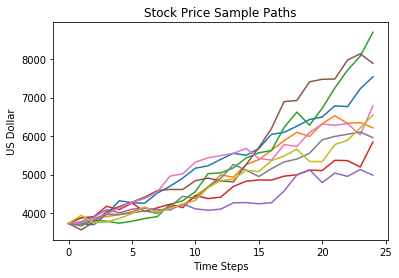

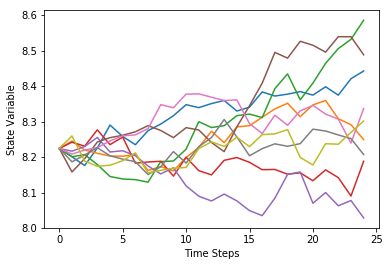

In [12]:
# plot 10 paths
step_size = N_MC // 10
idx_plot = np.arange(step_size, N_MC, step_size)

plt.plot(S.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.ylabel('US Dollar')
plt.title('Stock Price Sample Paths')
plt.show()

plt.plot(X.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.ylabel('State Variable')
plt.show()

Define function *terminal_payoff* to compute the terminal payoff of a European put option.

$$H_T\left(S_T\right)=\max\left(K-S_T,0\right)$$

In [13]:
def terminal_payoff(ST, K):
    # ST   final stock price
    # K    strike
    payoff = max(K - ST, 0)
    return payoff

In [14]:
type(delta_S)

pandas.core.frame.DataFrame

##  Define spline basis functions  

In [15]:
import bspline
import bspline.splinelab as splinelab

X_min = np.min(np.min(X))
X_max = np.max(np.max(X))
print('X.shape = ', X.shape)
print('X_min, X_max = ', X_min, X_max)

p = 4              # order of spline (as-is; 3 = cubic, 4: B-spline?)
ncolloc = 12

tau = np.linspace(X_min,X_max,ncolloc)  # These are the sites to which we would like to interpolate

k = splinelab.aptknt(tau, p) 
                             
# Spline basis of order p on knots k
basis = bspline.Bspline(k, p)        
        
#f = plt.figure()
# B   = bspline.Bspline(k, p)     # Spline basis functions 
print('Number of points k = ', len(k))
#basis.plot()

#plt.savefig('Basis_functions.png', dpi=600)

X.shape =  (10000, 25)
X_min, X_max =  7.566550630074799 8.887880446998258
Number of points k =  17


In [16]:
type(basis)

bspline.bspline.Bspline

In [17]:
X.values.shape

(10000, 25)

### Make data matrices with feature values

In [18]:
num_t_steps = T + 1
num_basis =  ncolloc # len(k) #

data_mat_t = np.zeros((num_t_steps, N_MC,num_basis ))
print('num_basis = ', num_basis)
print('dim data_mat_t = ', data_mat_t.shape)

t_0 = time.time()
# fill it 
for i in np.arange(num_t_steps):
    x = X.values[:,i]
    data_mat_t[i,:,:] = np.array([ basis(el) for el in x ])

t_end = time.time()
print('Computational time:', t_end - t_0, 'seconds')

num_basis =  12
dim data_mat_t =  (25, 10000, 12)
Computational time: 46.274189949035645 seconds


In [19]:
# save these data matrices for future re-use
np.save('data_mat_m=r_A_%d' % N_MC, data_mat_t)

In [20]:
print(data_mat_t.shape)  # shape num_steps x N_MC x num_basis
print(len(k))
print(type(data_mat_t))

(25, 10000, 12)
17
<class 'numpy.ndarray'>


## Dynamic Programming solution for QLBS 

The MDP problem in this case is to solve the following Bellman optimality equation for the action-value function.

$$Q_t^\star\left(x,a\right)=\mathbb{E}_t\left[R_t\left(X_t,a_t,X_{t+1}\right)+\gamma\max_{a_{t+1}\in\mathcal{A}}Q_{t+1}^\star\left(X_{t+1},a_{t+1}\right)\space|\space X_t=x,a_t=a\right],\space\space t=0,...,T-1,\quad\gamma=e^{-r\Delta t}$$

where $R_t\left(X_t,a_t,X_{t+1}\right)$ is the one-step time-dependent random reward and $a_t\left(X_t\right)$ is the action (hedge).

Detailed steps of solving this equation by Dynamic Programming are illustrated below.

With this set of basis functions $\left\{\Phi_n\left(X_t^k\right)\right\}_{n=1}^N$, expand the optimal action (hedge) $a_t^\star\left(X_t\right)$ and optimal Q-function $Q_t^\star\left(X_t,a_t^\star\right)$ in basis functions with time-dependent coefficients.
$$a_t^\star\left(X_t\right)=\sum_n^N{\phi_{nt}\Phi_n\left(X_t\right)}\quad\quad Q_t^\star\left(X_t,a_t^\star\right)=\sum_n^N{\omega_{nt}\Phi_n\left(X_t\right)}$$

Coefficients $\phi_{nt}$ and $\omega_{nt}$ are computed recursively backward in time for $t=T−1,...,0$. 

Coefficients for expansions of the optimal action $a_t^\star\left(X_t\right)$ are solved by

$$\phi_t=\mathbf A_t^{-1}\mathbf B_t$$

where $\mathbf A_t$ and $\mathbf B_t$ are matrix and vector respectively with elements given by

$$A_{nm}^{\left(t\right)}=\sum_{k=1}^{N_{MC}}{\Phi_n\left(X_t^k\right)\Phi_m\left(X_t^k\right)\left(\Delta\hat{S}_t^k\right)^2}\quad\quad B_n^{\left(t\right)}=\sum_{k=1}^{N_{MC}}{\Phi_n\left(X_t^k\right)\left[\hat\Pi_{t+1}^k\Delta\hat{S}_t^k+\frac{1}{2\gamma\lambda}\Delta S_t^k\right]}$$

$$\Delta S_t=S_{t+1} - e^{-r\Delta t} S_t\space \quad t=T-1,...,0$$
where $\Delta\hat{S}_t$ is the sample mean of all values of $\Delta S_t$.

Define function *function_A* and *function_B* to compute the value of matrix $\mathbf A_t$ and vector $\mathbf B_t$.

## Define the option strike and risk aversion parameter

In [21]:
risk_lambda = 0.001 # risk aversion
K = 3743.3166          # option strike from Jex.com

### Calculate coefficients  $\phi_{nt}$ of the optimal action $a_t^\star\left(X_t\right)$

In [22]:
# functions to compute optimal hedges
def function_A_vec(t, delta_S_hat, data_mat, reg_param):
    
    """
    Arguments:
    t - time index, a scalar, an index into time axis of data_mat
    delta_S_hat - pandas.DataFrame of dimension N_MC x T
    data_mat - pandas.DataFrame of dimension T x N_MC x num_basis
    reg_param - a scalar, regularization parameter
    
    Return:
    - np.array, i.e. matrix A_{nm} of dimension num_basis x num_basis
    
    """
    
    
    X_mat = data_mat[t, :, :]
    num_basis_funcs = X_mat.shape[1]
    this_dS = delta_S_hat.loc[:, t]
    hat_dS2 = (this_dS ** 2).reshape(-1, 1)
    A_mat = np.dot(X_mat.T, X_mat * hat_dS2) + reg_param * np.eye(num_basis_funcs)
    
    return A_mat
   
        
def function_B_vec(t, 
                   Pi_hat, 
                   delta_S_hat=delta_S_hat, 
                   S=S, 
                   data_mat=data_mat_t,
                   gamma=gamma,
                   risk_lambda=risk_lambda):
    """
    
    
    Arguments:
    t - time index, a scalar, an index into time axis of delta_S_hat
    Pi_hat - pandas.DataFrame of dimension N_MC x T of portfolio values 
    delta_S_hat - pandas.DataFrame of dimension N_MC x T
    S - pandas.DataFrame of simulated stock prices of dimension N_MC x T
    data_mat - pandas.DataFrame of dimension T x N_MC x num_basis
    gamma - one time-step discount factor $exp(-r \delta t)$
    risk_lambda - risk aversion coefficient, a small positive number
    
    Return:
    np.array() of dimension num_basis x 1
    """

    
    
    tmp = Pi_hat.loc[:,t+1] * delta_S_hat.loc[:, t]
    X_mat = data_mat[t, :, :]  # matrix of dimension N_MC x num_basis
    B_vec = np.dot(X_mat.T, tmp)
    
    return B_vec

In [23]:
reg_param = 1e-3
np.random.seed(42)

A_mat = function_A_vec(T-1, delta_S_hat, data_mat_t, reg_param)
idx_row = np.random.randint(low=0, high=A_mat.shape[0], size=50)

np.random.seed(42)
idx_col = np.random.randint(low=0, high=A_mat.shape[1], size=50)


part_1 = list(A_mat[idx_row, idx_col])
try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)


A_mat[idx_row, idx_col]

/Users/huaizhexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


array([5.44490991e+07, 5.27490038e+06, 9.70000051e+05, 5.27124343e+07,
       2.80655129e+07, 5.44490991e+07, 3.21831274e+06, 8.24621891e+05,
       5.44490991e+07, 9.70000051e+05, 9.70000051e+05, 5.27124343e+07,
       2.80655129e+07, 5.27490038e+06, 5.27124343e+07, 5.27124343e+07,
       8.24621891e+05, 4.51428240e+07, 2.80655129e+07, 9.65148014e+04,
       5.27124343e+07, 2.17464825e+05, 4.51428240e+07, 9.65148014e+04,
       2.17464825e+05, 2.80655129e+07, 5.05819257e+04, 2.17464825e+05,
       3.21831274e+06, 4.51428240e+07, 2.17464825e+05, 1.57544396e+07,
       5.05819257e+04, 9.70000051e+05, 9.70000051e+05, 3.21831274e+06,
       2.17464825e+05, 2.17464825e+05, 8.24621891e+05, 2.17464825e+05,
       5.44490991e+07, 5.27490038e+06, 1.57544396e+07, 8.24621891e+05,
       2.80655129e+07, 8.24621891e+05, 5.44490991e+07, 2.80655129e+07,
       1.57544396e+07, 5.44490991e+07])

In [24]:
np.random.seed(42)
risk_lambda = 0.001
Pi = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi.iloc[:,-1] = S.iloc[:,-1].apply(lambda x: terminal_payoff(x, K))

Pi_hat = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi_hat.iloc[:,-1] = Pi.iloc[:,-1] - np.mean(Pi.iloc[:,-1])
B_vec = function_B_vec(T-1, Pi_hat, delta_S_hat, S, data_mat_t, gamma, risk_lambda)

part_2 = list(B_vec)
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)


B_vec

array([ -97718.16714326, -259402.90976863, -214451.79576738,
        -64772.27880254,   10010.63668955,   10078.17980747,
         -7158.39140045,  -15186.2535229 ,  -10111.05317346,
         -4058.88401782,   -1209.12653728,    -401.19584032])

## Compute optimal hedge and portfolio value

Call *function_A* and *function_B* for $t=T-1,...,0$ together with basis function $\Phi_n\left(X_t\right)$ to compute optimal action $a_t^\star\left(X_t\right)=\sum_n^N{\phi_{nt}\Phi_n\left(X_t\right)}$ backward recursively with terminal condition $a_T^\star\left(X_T\right)=0$.

Once the optimal hedge $a_t^\star\left(X_t\right)$ is computed, the portfolio value $\Pi_t$ could also be computed backward recursively by 

$$\Pi_t=\gamma\left[\Pi_{t+1}-a_t^\star\Delta S_t\right]\quad t=T-1,...,0$$

together with the terminal condition $\Pi_T=H_T\left(S_T\right)=\max\left(K-S_T,0\right)$ for a European put option.

In [25]:
starttime = time.time()

# portfolio value
Pi = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi.iloc[:,-1] = S.iloc[:,-1].apply(lambda x: terminal_payoff(x, K))

Pi_hat = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi_hat.iloc[:,-1] = Pi.iloc[:,-1] - np.mean(Pi.iloc[:,-1])

# optimal hedge
a = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
a.iloc[:,-1] = 0

reg_param = 1e-3 # free parameter
for t in range(T-1, -1, -1):
    A_mat = function_A_vec(t, delta_S_hat, data_mat_t, reg_param)
    B_vec = function_B_vec(t, Pi_hat, delta_S_hat, S, data_mat_t, gamma, risk_lambda)
    # print ('t =  A_mat.shape = B_vec.shape = ', t, A_mat.shape, B_vec.shape)
    
    # coefficients for expansions of the optimal action
    phi = np.dot(np.linalg.inv(A_mat), B_vec)
    
    a.loc[:,t] = np.dot(data_mat_t[t,:,:],phi)
    Pi.loc[:,t] = gamma * (Pi.loc[:,t+1] - a.loc[:,t] * delta_S.loc[:,t])
    Pi_hat.loc[:,t] = Pi.loc[:,t] - np.mean(Pi.loc[:,t])
    
a = a.astype('float')
Pi = Pi.astype('float')
Pi_hat = Pi_hat.astype('float')

endtime = time.time()
print('Computational time:', endtime - starttime, 'seconds')

/Users/huaizhexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Computational time: 0.37427496910095215 seconds


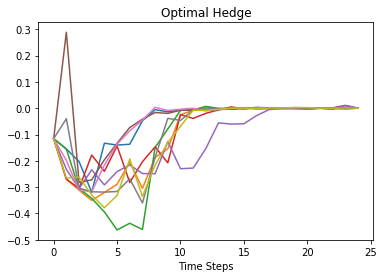

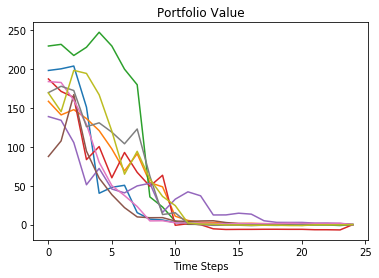

In [26]:
# plot 10 paths

plt.plot(a.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Optimal Hedge')
plt.show()

plt.plot(Pi.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Portfolio Value')
plt.show()

## Compute rewards for all paths

Once the optimal hedge $a_t^\star$ and portfolio value $\Pi_t$ are all computed, the reward function $R_t\left(X_t,a_t,X_{t+1}\right)$ could then be computed by

$$R_t\left(X_t,a_t,X_{t+1}\right)=\gamma a_t\Delta S_t-\lambda Var\left[\Pi_t\space|\space\mathcal F_t\right]\quad t=0,...,T-1$$

with terminal condition $R_T=-\lambda Var\left[\Pi_T\right]$.


Time Cost: 0.15506505966186523 seconds


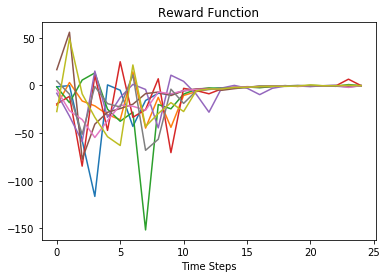

In [27]:

# Compute rewards for all paths
starttime = time.time()
# reward function
R = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
R.iloc[:,-1] = - risk_lambda * np.var(Pi.iloc[:,-1])

for t in range(T):
    R.loc[1:,t] = gamma * a.loc[1:,t] * delta_S.loc[1:,t] - risk_lambda * np.var(Pi.loc[1:,t])

endtime = time.time()
print('\nTime Cost:', endtime - starttime, 'seconds')
  
# plot 10 paths
plt.plot(R.T.iloc[:, idx_plot])
plt.xlabel('Time Steps')
plt.title('Reward Function')
plt.show()

## Compute the optimal Q-function with the DP approach 


Coefficients for expansions of the optimal Q-function $Q_t^\star\left(X_t,a_t^\star\right)$ are solved by

$$\omega_t=\mathbf C_t^{-1}\mathbf D_t$$

where $\mathbf C_t$ and $\mathbf D_t$ are matrix and vector respectively with elements given by

$$C_{nm}^{\left(t\right)}=\sum_{k=1}^{N_{MC}}{\Phi_n\left(X_t^k\right)\Phi_m\left(X_t^k\right)}\quad\quad D_n^{\left(t\right)}=\sum_{k=1}^{N_{MC}}{\Phi_n\left(X_t^k\right)\left(R_t\left(X_t,a_t^\star,X_{t+1}\right)+\gamma\max_{a_{t+1}\in\mathcal{A}}Q_{t+1}^\star\left(X_{t+1},a_{t+1}\right)\right)}$$

In [28]:
def function_C_vec(t, data_mat, reg_param):
    """
    
    Arguments:
    t - time index, a scalar, an index into time axis of data_mat 
    data_mat - pandas.DataFrame of values of basis functions of dimension T x N_MC x num_basis
    reg_param - regularization parameter, a scalar
    
    Return:
    C_mat - np.array of dimension num_basis x num_basis
    """
    X_mat = data_mat[t, :, :]
    num_basis_funcs = X_mat.shape[1]
    C_mat = np.dot(X_mat.T, X_mat) + reg_param * np.eye(num_basis_funcs)
    return C_mat
   
def function_D_vec(t, Q, R, data_mat, gamma=gamma):
    """
    function_D_vec - calculate D_{nm} vector from Eq. (56) (with a regularization!)
    Eq. (56) in QLBS Q-Learner in the Black-Scholes-Merton article
    
    Arguments:
    t - time index, a scalar, an index into time axis of data_mat 
    Q - pandas.DataFrame of Q-function values of dimension N_MC x T
    R - pandas.DataFrame of rewards of dimension N_MC x T
    data_mat - pandas.DataFrame of values of basis functions of dimension T x N_MC x num_basis
    gamma - one time-step discount factor $exp(-r \delta t)$
    
    Return:
    D_vec - np.array of dimension num_basis x 1
    """
    
    X_mat = data_mat[t, :, :]
    D_vec = np.dot(X_mat.T, R.loc[:,t] + gamma * Q.loc[:, t+1])
    return D_vec

In [29]:
C_mat = function_C_vec(T-1, data_mat_t, reg_param)
np.random.seed(42)
idx_row = np.random.randint(low=0, high=C_mat.shape[0], size=50)

np.random.seed(42)
idx_col = np.random.randint(low=0, high=C_mat.shape[1], size=50)

part_3 = list(C_mat[idx_row, idx_col])

try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)


C_mat[idx_row, idx_col]

array([1.09774699e+03, 2.10343651e+02, 4.56877655e+00, 8.41911156e+02,
       8.69395802e+02, 1.09774699e+03, 3.30191775e+01, 3.53203253e+01,
       1.09774699e+03, 4.56877655e+00, 4.56877655e+00, 8.41911156e+02,
       8.69395802e+02, 2.10343651e+02, 8.41911156e+02, 8.41911156e+02,
       3.53203253e+01, 1.10328718e+03, 8.69395802e+02, 4.35986560e+00,
       8.41911156e+02, 1.04949534e+00, 1.10328718e+03, 4.35986560e+00,
       1.04949534e+00, 8.69395802e+02, 2.34165631e+00, 1.04949534e+00,
       3.30191775e+01, 1.10328718e+03, 1.04949534e+00, 1.99059232e+02,
       2.34165631e+00, 4.56877655e+00, 4.56877655e+00, 3.30191775e+01,
       1.04949534e+00, 1.04949534e+00, 3.53203253e+01, 1.04949534e+00,
       1.09774699e+03, 2.10343651e+02, 1.99059232e+02, 3.53203253e+01,
       8.69395802e+02, 3.53203253e+01, 1.09774699e+03, 8.69395802e+02,
       1.99059232e+02, 1.09774699e+03])

In [30]:
Q = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Q.iloc[:,-1] = - Pi.iloc[:,-1] - risk_lambda * np.var(Pi.iloc[:,-1])
D_vec = function_D_vec(T-1, Q, R, data_mat_t,gamma)


part_4 = list(D_vec)
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part4 = repr(part_4)


D_vec

array([-1767.12795522, -1943.93997609, -1546.59769091,  -764.35544124,
        -912.7197479 ,  -906.29546679,  -907.39328647,  -648.98180579,
        -229.34285989,   -57.86696296,   -12.66676324,    -5.87653792])

Call *function_C* and *function_D* for $t=T-1,...,0$ together with basis function $\Phi_n\left(X_t\right)$ to compute optimal action Q-function $Q_t^\star\left(X_t,a_t^\star\right)=\sum_n^N{\omega_{nt}\Phi_n\left(X_t\right)}$ backward recursively with terminal condition $Q_T^\star\left(X_T,a_T=0\right)=-\Pi_T\left(X_T\right)-\lambda Var\left[\Pi_T\left(X_T\right)\right]$.


Time Cost: 0.21306920051574707 seconds


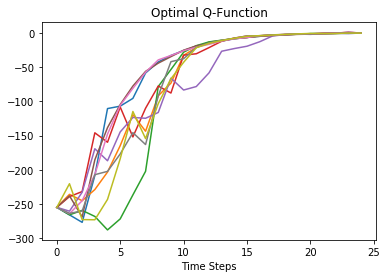

In [31]:
starttime = time.time()

# Q function
Q = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Q.iloc[:,-1] = - Pi.iloc[:,-1] - risk_lambda * np.var(Pi.iloc[:,-1])

reg_param = 1e-3
for t in range(T-1, -1, -1):
    C_mat = function_C_vec(t,data_mat_t,reg_param)
    D_vec = function_D_vec(t, Q,R,data_mat_t,gamma)
    omega = np.dot(np.linalg.inv(C_mat), D_vec)
    
    Q.loc[:,t] = np.dot(data_mat_t[t,:,:], omega)
    
Q = Q.astype('float')
endtime = time.time()
print('\nTime Cost:', endtime - starttime, 'seconds')

# plot 10 paths
plt.plot(Q.T.iloc[:, idx_plot])
plt.xlabel('Time Steps')
plt.title('Optimal Q-Function')
plt.show()

The QLBS option price is given by $C_t^{\left(QLBS\right)}\left(S_t,ask\right)=-Q_t\left(S_t,a_t^\star\right)$


## Summary of the QLBS pricing and comparison with the BSM pricing 

Compare the QLBS price to European put price given by Black-Sholes formula.

$$C_t^{\left(BS\right)}=Ke^{-r\left(T-t\right)}\mathcal N\left(-d_2\right)-S_t\mathcal N\left(-d_1\right)$$

In [32]:
# The Black-Scholes prices
def bs_put(t, S0=S0, K=K, r=r, sigma=sigma, T=M):
    d1 = (np.log(S0/K) + (r + 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    d2 = (np.log(S0/K) + (r - 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    price = K * np.exp(-r * (T-t)) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return price

def bs_call(t, S0=S0, K=K, r=r, sigma=sigma, T=M):
    d1 = (np.log(S0/K) + (r + 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    d2 = (np.log(S0/K) + (r - 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    price = S0 * norm.cdf(d1) - K * np.exp(-r * (T-t)) * norm.cdf(d2)
    return price


## The DP solution for QLBS

The Real Market data is from 2018/12/26 - 2019/01/02, the first day index is 382.
 Each option contract in Jex represents the purchase right of 0.002 BTC, so we need to multiply 500 for 1 bitcoin option pricing.

In [33]:
# QLBS option price
C_QLBS = -Q.copy()

part5 = str(C_QLBS.iloc[0,0])

C_QLBS.iloc[0,0]

254.71686648737352

### make a summary picture

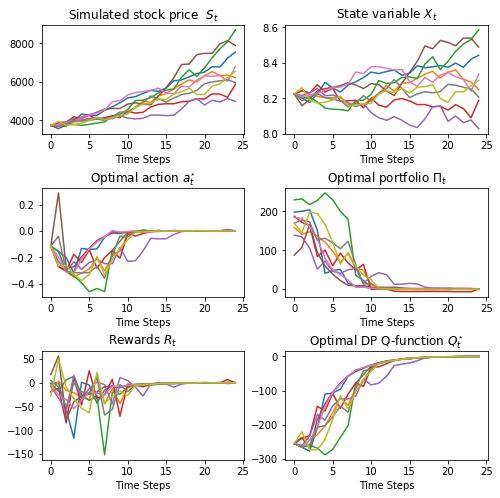

In [34]:
# plot: Simulated S_t and X_t values
# optimal hedge and portfolio values
# rewards and optimal Q-function

f, axarr = plt.subplots(3, 2)
f.subplots_adjust(hspace=.5)
f.set_figheight(8.0)
f.set_figwidth(8.0)

axarr[0, 0].plot(S.T.iloc[:,idx_plot]) 
axarr[0, 0].set_xlabel('Time Steps')
axarr[0, 0].set_title(r'Simulated stock price  $S_t$')

axarr[0, 1].plot(X.T.iloc[:,idx_plot]) 
axarr[0, 1].set_xlabel('Time Steps')
axarr[0, 1].set_title(r'State variable $X_t$')

axarr[1, 0].plot(a.T.iloc[:,idx_plot]) 
axarr[1, 0].set_xlabel('Time Steps')
axarr[1, 0].set_title(r'Optimal action $a_t^{\star}$')

axarr[1, 1].plot(Pi.T.iloc[:,idx_plot]) 
axarr[1, 1].set_xlabel('Time Steps')
axarr[1, 1].set_title(r'Optimal portfolio $\Pi_t$')

axarr[2, 0].plot(R.T.iloc[:,idx_plot]) 
axarr[2, 0].set_xlabel('Time Steps')
axarr[2, 0].set_title(r'Rewards $R_t$') 

axarr[2, 1].plot(Q.T.iloc[:,idx_plot]) 
axarr[2, 1].set_xlabel('Time Steps')
axarr[2, 1].set_title(r'Optimal DP Q-function $Q_t^{\star}$')


# plt.savefig('QLBS_DP_summary_graphs_ATM_option_mu=r.png', dpi=600)
# plt.savefig('QLBS_DP_summary_graphs_ATM_option_mu>r.png', dpi=600)
plt.savefig('QLBS_DP_summary_graphs_ATM_option_mu>r.png', dpi=600)

plt.show()

In [35]:
# plot convergence to the Black-Scholes values

# lam = 0.0001, Q = 4.1989 +/- 0.3612 # 4.378
# lam = 0.001: Q = 4.9004 +/- 0.1206  # Q=6.283
# lam = 0.005: Q = 8.0184 +/- 0.9484 # Q = 14.7489
# lam = 0.01: Q = 11.9158 +/- 2.2846 # Q = 25.33

#lam_vals = np.array([0.0001, 0.001, 0.005, 0.01])
# Q_vals =  np.array([3.77, 3.81, 4.57, 7.967,12.2051])
#Q_vals =  np.array([4.1989, 4.9004, 8.0184, 11.9158])
#Q_std =  np.array([0.3612,0.1206, 0.9484, 2.2846])

#BS_price = bs_put(0)

# f, axarr = plt.subplots(1, 1)
#fig, ax = plt.subplots(1, 1)

#f.subplots_adjust(hspace=.5)
#f.set_figheight(4.0)
#f.set_figwidth(4.0)

# ax.plot(lam_vals,Q_vals) 
#ax.errorbar(lam_vals, Q_vals, yerr=Q_std, fmt='o')

#ax.set_xlabel('Risk aversion')
#ax.set_ylabel('Optimal option price')
#ax.set_title(r'Optimal option price vs risk aversion')
#ax.axhline(y=BS_price,linewidth=2, color='r')
#textstr = 'BS price = %2.2f'% (BS_price)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)                      
# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
#plt.savefig('Opt_price_vs_lambda_Markowitz.png')
#plt.show()

In [36]:
df_week2put["price"]=df_week2put.Price*500
n = int(len(df_week2put) / 24)
jex_put_list = df_week2put["price"][::n]

/Users/huaizhexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-------------------------------------------
       QLBS Option Pricing (DP solution)      
-------------------------------------------

Initial Stock Price:      3730
Drift of Stock:           0.5
Volatility of Stock:      0.17
Risk-free Rate:           0.03
Risk aversion parameter:  0.001
Strike:                   3743.3166
Maturity:                 1

QLBS Put Price:           254.7169

Black-Sholes Put Price:   203.7131

Real Jex Exchange Put Price: 221.9000




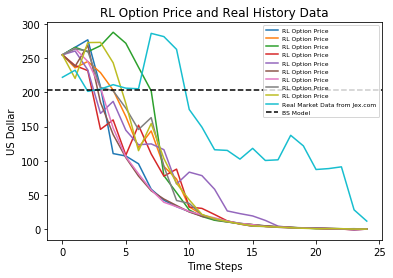

In [37]:


# The Real Market data is from 2018/12/26 - 2019/01/02, the first day index is 382.
# Each option contract in Jex represents the purchase right of 0.002 BTC: 1:500, so we need to multiply 500 for 1 bitcoin option pricing.
jex_put = df_week2put.Price[382] * 500

print('-------------------------------------------')
print('       QLBS Option Pricing (DP solution)      ')
print('-------------------------------------------\n')
print('%-25s' % ('Initial Stock Price:'), S0)
print('%-25s' % ('Drift of Stock:'), mu)
print('%-25s' % ('Volatility of Stock:'), sigma)
print('%-25s' % ('Risk-free Rate:'), r)
print('%-25s' % ('Risk aversion parameter: '), risk_lambda)
print('%-25s' % ('Strike:'), K)
print('%-25s' % ('Maturity:'), M)
print('%-26s %.4f' % ('\nQLBS Put Price: ', C_QLBS.iloc[0,0]))
print('%-26s %.4f' % ('\nBlack-Sholes Put Price:', bs_put(0)))
print('%-26s %.4f' % ('\nReal Jex Exchange Put Price:', jex_put))
print('\n')

# plot 10 paths and real history data
x = np.arange(25)
plt.plot(C_QLBS.T.iloc[:,idx_plot], label = 'RL Option Price')
plt.plot(x, jex_put_list, label = 'Real Market Data from Jex.com')
plt.axhline(bs_put(0), ls = '--', c = 'k', label = 'BS Model')
plt.legend(loc = 'best', prop={'size': 6})
plt.xlabel('Time Steps')
plt.ylabel('US Dollar')
plt.title('RL Option Price and Real History Data')
plt.savefig('Result-RL-Bitcoin-Option')